# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [12]:
# Your code here.

import pandas as pd
import matplotlib.pyplot as plt


x_values = [17,51,27,21,36,48,19,26,54,30]
y_values = [10,1,5,9,4,2,9,6,0,3]

student_data = pd.DataFrame({'X': x_values, 'Y': y_values})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

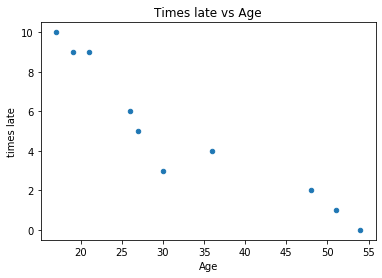

In [19]:
# Your code here.

student_data.plot.scatter(x = 'X',y = 'Y')


plt.title('Times late vs Age')
plt.xlabel('Age')
plt.ylabel('times late')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 

# there seems to be a negative linear trend: when Age increases the number of times late decreases


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [23]:
# Your response here.
#correlation:
print(student_data.corr())

#covariance:
student_data.cov()

#Correlation: the correlation of x with x and y with y is 1 , the correlation between x and y is negative with a high value of 93,9%
#Covariance: The covariance of x with itself is higher than y with itself which translates the fact that the values of x are more dispersed with regarded to x_mean in comparison to the y set of values
#Covariance: The covariance between x and y is 45 and measures the joint variability of y when x increases

          X         Y
X  1.000000 -0.939163
Y -0.939163  1.000000


,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [27]:
# Your response here.

from scipy import stats

results = stats.linregress(student_data['X'],student_data['Y'])
results

LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)

Plot your regression model on your scatter plot.

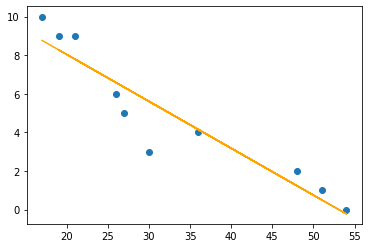

In [32]:
# Your code here.

plt.scatter(student_data['X'],student_data['Y'])

# regression line
regression_line = results[0]*student_data['X'] + results[1]

plt.plot(student_data['X'], regression_line, 'orange')

plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 

# Visually the line fits quite well the scatter plot. The R-value confirms this observation with an R equal to -0,93 which is equal to a R_2 equal to 86,4% fit of the scatter plot
 


In [33]:
-0.93**2

-0.8649000000000001

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [35]:
# Import any libraries you may need & the data

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

emissions = pd.read_csv('/Users/pietervierstraete/Desktop/Ironhack/week4/lab-regression-analysis/your-code/vehicles.csv')


In [36]:
# getting to know the dataframe (1)
emissions.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [45]:
# getting to know the dataframe (2)

emissions.dtypes

Make                        object
Model                       object
Year                         int64
Engine Displacement        float64
Cylinders                  float64
Transmission                object
Drivetrain                  object
Vehicle Class               object
Fuel Type                   object
Fuel Barrels/Year          float64
City MPG                     int64
Highway MPG                  int64
Combined MPG                 int64
CO2 Emission Grams/Mile    float64
Fuel Cost/Year               int64
dtype: object

In [46]:
# getting to know the dataframe (3)

emissions.shape

(35952, 15)

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [53]:
emissions_corr = emissions.corr()

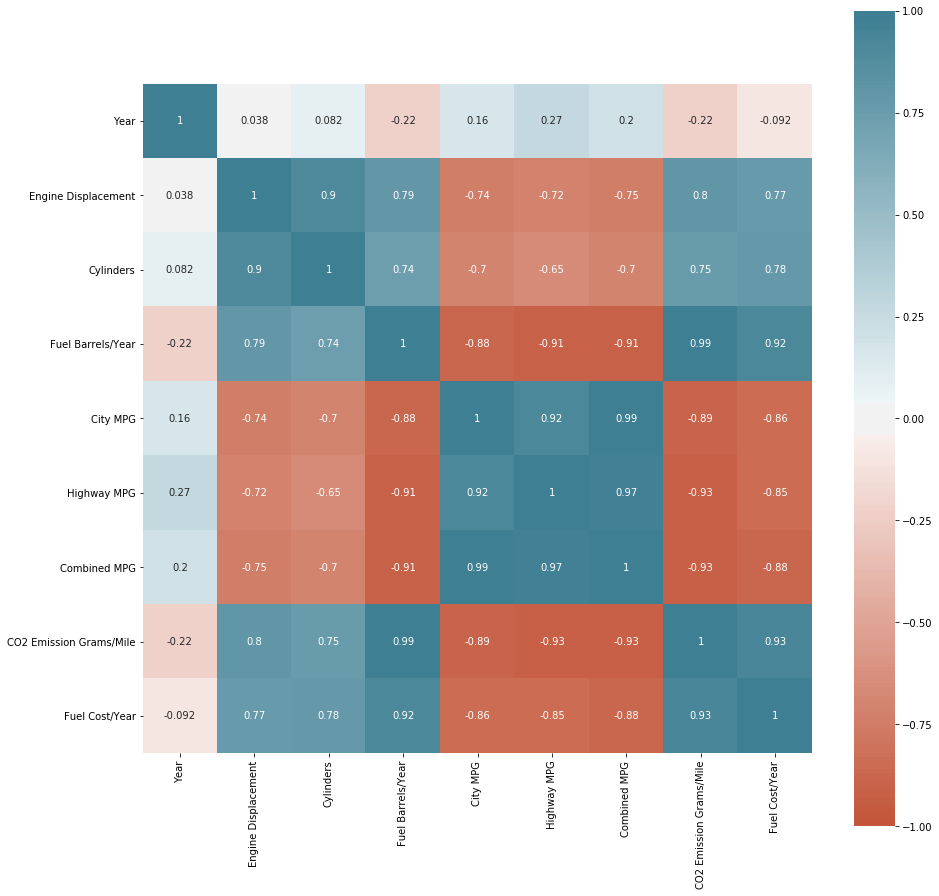

In [59]:
# make a heatmap of the correlation matrix

import seaborn as sns

plt.subplots(figsize=(15,15))

ax = sns.heatmap(
    emissions_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True)




In [67]:
col = emissions_corr['CO2 Emission Grams/Mile']
col.sort_values(ascending = False)


CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Engine Displacement        0.803520
Cylinders                  0.752393
Year                      -0.222300
City MPG                  -0.894139
Combined MPG              -0.926229
Highway MPG               -0.926405
Name: CO2 Emission Grams/Mile, dtype: float64

In [ ]:
# Your response here. 
# The correlation matrix reveals that the most correlated variable with the CO2 emissions is "Fuel barrels/year" and the least explanatory variable is the year which is negatively correlated with -0,22


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [118]:
# Your response here. 
# Use of a multilinear regression

import statsmodels.api as sm

# the list of independant variables selected
Y = emissions['CO2 Emission Grams/Mile']
X = emissions[['Fuel Barrels/Year','Fuel Cost/Year','Highway MPG']]

# with statsmodels
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

# I use a multilinear regression to model the dedenpent variable Y based on the 3 dependent variables previously selected


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [117]:
# Your response here. 

model.summary()

# the R_2 value is 0,999 which is extremely high considering that the theoretical maximum is 1 which would mean that the model with the 3 independent variables perfectly describe the dependent variable

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          8.748e+06
Date:                     Thu, 23 Jul 2020   Prob (F-statistic):                        0.00
Time:                             16:55:42   Log-Likelihood:                     -1.5517e+05
No. Observations:                    35952   AIC:                                  3.104e+05
Df Residuals:                        35949   BIC:                                  3.104e+05
Df Model:                                3                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fuel Barrels/Year    22.5062      0.051    439.726      0.000      22.406      22.607
Fuel Cost/Year        0.0407      0.000     86.547      0.000       0.040       0.042
Highway MPG           0.0683      0.008      8.093      0.000       0.052       0.085
==============================================================================
Omnibus:                    79251.510   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        471477206.199
Skew:                          20.422   Prob(JB):                         0.00
Kurtosis:                     562.526   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [91]:
# Your code here.

num_people = [1,3,4,6,8,9,11,14]
num_attend = [1,2,4,4,5,7,8,13]

df = pd.DataFrame({"Num of people":num_people, "Num attendance":num_attend})
df

,Num of people,Num attendance
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

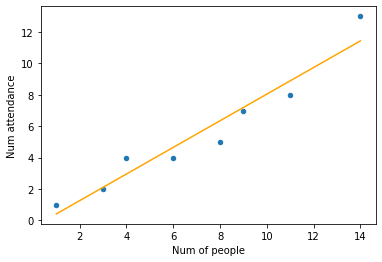

In [99]:
# Your code here.

df.plot.scatter('Num of people','Num attendance')


# regression analysis
results = stats.linregress(df['Num of people'],df['Num attendance'])
results

# plot the regression line
# regression line
regression_line = results[0]*df['Num of people'] + results[1]

plt.plot(df['Num of people'], regression_line, 'orange')

plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [100]:
# Your response here. 

#The rvalue_squared is equal to 0,93 which is a very hig level of correlation.
# this means that an increase in the number of people leads to an increase in the attendance and vice versa

# The slope is equal to 0,84, thus inviting one persone leads to 0,16 not attending

results


LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [102]:
# Your response here. 

# I wouldn't really say there are outliers in the model. The biggest outlier would be the last value (14,13), removing it would help the model fit the other points with more accuracy

# drop the last row of the dataframe
last_row = len(df)-1

df = df.drop(df.index[last_row])
df




,Num of people,Num attendance
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


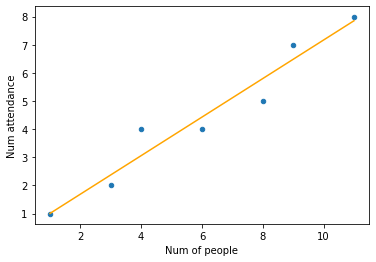

In [103]:
#---------------------computing the linear regression----------------------------#

results = stats.linregress(df['Num of people'],df['Num attendance'])
results

#---------------------plotting the graph----------------------------#
df.plot.scatter('Num of people','Num attendance')


# regression analysis
results = stats.linregress(df['Num of people'],df['Num attendance'])
results

# plot the regression line
# regression line
regression_line = results[0]*df['Num of people'] + results[1]

plt.plot(df['Num of people'], regression_line, 'orange')

plt.show()

In [104]:
results

LinregressResult(slope=0.6842105263157895, intercept=0.32330827067669166, rvalue=0.971278116825086, pvalue=0.0002644056885656864, stderr=0.07496206665031292)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# taking the outlier out increases the rvalue thus the interpolation without the outlier is a better fit but also with less information one should recall.
# I don't consider the point we took out here as an outlier (because not so different from the rest) and because the set of data is small, taking out one value has a big impact on the regression
# therefore, I wouldn't take the value (14,13) out
